In [1]:
from keras.layers import Dense, Activation, Dropout, Bidirectional
from keras.layers.recurrent import LSTM
from keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
model = Sequential()
model.add(Bidirectional(LSTM(units=128, return_sequences=True, dropout=0.7),
                        input_shape=(7, 4096)))
model.add(Bidirectional(LSTM(256, dropout=0.8)))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.9))

model.add(Dense(101))

model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [3]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_1 (Bidirection (None, 7, 256)            4326400   
_________________________________________________________________
bidirectional_2 (Bidirection (None, 512)               1050624   
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 101)               51813     
_________________________________________________________________
activation_1 (Activation)    (None, 101)               0         
Total params: 5,691,493
Trainable params: 5,691,493
Non-trainable params: 0
_________________________________________________________________


In [4]:
BATCH_SIZE = 512

In [5]:
def generate_batch(x_samples, y_samples):
    num_batches = len(x_samples) // BATCH_SIZE

    while True:
        for batchIdx in range(0, num_batches):
            start = batchIdx * BATCH_SIZE
            end = (batchIdx + 1) * BATCH_SIZE
            yield np.array(x_samples[start:end]), y_samples[start:end]

In [6]:
x = np.load('xfe.npy',allow_pickle=True)
y = np.load('yfe.npy',allow_pickle=True)

In [7]:
x.shape

(13320, 7, 4096)

In [8]:
from sklearn.model_selection import train_test_split
from keras.callbacks import ModelCheckpoint

In [9]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(x, y, test_size=0.3,random_state=25)

In [10]:
train_gen = generate_batch(Xtrain, Ytrain)
test_gen = generate_batch(Xtest, Ytest)

In [11]:
train_num_batches = len(Xtrain) // BATCH_SIZE
test_num_batches = len(Xtest) // BATCH_SIZE

In [12]:
checkpoint = ModelCheckpoint(filepath='weights/model-ep{epoch:03d}-acc{acc:.3f}-val_acc{val_acc:.3f}.h5', save_best_only=True)

In [13]:
NUM_EPOCHS = 750

In [14]:
history = model.fit_generator(generator=train_gen, steps_per_epoch=train_num_batches,
                              epochs=NUM_EPOCHS,
                              verbose=1, validation_data=test_gen, validation_steps=test_num_batches,
                              callbacks=[checkpoint])

Instructions for updating:
Use tf.cast instead.
Epoch 1/750
18/18 [==============================] - 7s 390ms/step - loss: 4.7102 - acc: 0.0098 - val_loss: 4.6010 - val_acc: 0.0343
Epoch 2/750
18/18 [==============================] - 3s 185ms/step - loss: 4.6157 - acc: 0.0142 - val_loss: 4.5868 - val_acc: 0.0340
Epoch 3/750
18/18 [==============================] - 3s 182ms/step - loss: 4.5879 - acc: 0.0174 - val_loss: 4.4954 - val_acc: 0.0862
Epoch 4/750
18/18 [==============================] - 3s 183ms/step - loss: 4.4940 - acc: 0.0298 - val_loss: 4.1668 - val_acc: 0.0857
Epoch 5/750
18/18 [==============================] - 3s 184ms/step - loss: 4.2991 - acc: 0.0473 - val_loss: 3.8614 - val_acc: 0.1038
Epoch 6/750
18/18 [==============================] - 3s 182ms/step - loss: 4.1265 - acc: 0.0681 - val_loss: 3.6234 - val_acc: 0.1387
Epoch 7/750
18/18 [==============================] - 3s 181ms/step - loss: 3.9566 - acc: 0.0792 - val_loss: 3.3546 - val_acc: 0.1819
Epoch 8/750
18/18 [==

18/18 [==============================] - 3s 179ms/step - loss: 0.4469 - acc: 0.8643 - val_loss: 0.5891 - val_acc: 0.8836
Epoch 122/750
18/18 [==============================] - 3s 181ms/step - loss: 0.4483 - acc: 0.8669 - val_loss: 0.5621 - val_acc: 0.8945
Epoch 123/750
18/18 [==============================] - 3s 183ms/step - loss: 0.4482 - acc: 0.8661 - val_loss: 0.5568 - val_acc: 0.8867
Epoch 124/750
18/18 [==============================] - 3s 181ms/step - loss: 0.4281 - acc: 0.8737 - val_loss: 0.5968 - val_acc: 0.8926
Epoch 125/750
18/18 [==============================] - 3s 182ms/step - loss: 0.4388 - acc: 0.8696 - val_loss: 0.5785 - val_acc: 0.8892
Epoch 126/750
18/18 [==============================] - 3s 184ms/step - loss: 0.4289 - acc: 0.8728 - val_loss: 0.5933 - val_acc: 0.8890
Epoch 127/750
18/18 [==============================] - 3s 179ms/step - loss: 0.4374 - acc: 0.8735 - val_loss: 0.5432 - val_acc: 0.8951
Epoch 128/750
18/18 [==============================] - 3s 183ms/step 

Epoch 182/750
18/18 [==============================] - 3s 183ms/step - loss: 0.3143 - acc: 0.9103 - val_loss: 0.5828 - val_acc: 0.9141
Epoch 183/750
18/18 [==============================] - 3s 181ms/step - loss: 0.3037 - acc: 0.9159 - val_loss: 0.5641 - val_acc: 0.9138
Epoch 184/750
18/18 [==============================] - 3s 182ms/step - loss: 0.3116 - acc: 0.9135 - val_loss: 0.5919 - val_acc: 0.9088
Epoch 185/750
18/18 [==============================] - 3s 180ms/step - loss: 0.3208 - acc: 0.9104 - val_loss: 0.5704 - val_acc: 0.9107
Epoch 186/750
18/18 [==============================] - 3s 183ms/step - loss: 0.3219 - acc: 0.9134 - val_loss: 0.5634 - val_acc: 0.9116
Epoch 187/750
18/18 [==============================] - 3s 181ms/step - loss: 0.3106 - acc: 0.9137 - val_loss: 0.5668 - val_acc: 0.9129
Epoch 188/750
18/18 [==============================] - 3s 182ms/step - loss: 0.3035 - acc: 0.9124 - val_loss: 0.5875 - val_acc: 0.9157
Epoch 189/750
18/18 [==============================] - 

Epoch 243/750
18/18 [==============================] - 3s 187ms/step - loss: 0.2533 - acc: 0.9331 - val_loss: 0.6102 - val_acc: 0.9202
Epoch 244/750
18/18 [==============================] - 3s 187ms/step - loss: 0.2471 - acc: 0.9337 - val_loss: 0.6315 - val_acc: 0.9182
Epoch 245/750
18/18 [==============================] - 3s 191ms/step - loss: 0.2455 - acc: 0.9332 - val_loss: 0.6612 - val_acc: 0.9149
Epoch 246/750
18/18 [==============================] - 3s 188ms/step - loss: 0.2593 - acc: 0.9352 - val_loss: 0.6186 - val_acc: 0.9196
Epoch 247/750
18/18 [==============================] - 3s 189ms/step - loss: 0.2633 - acc: 0.9346 - val_loss: 0.6611 - val_acc: 0.9174
Epoch 248/750
18/18 [==============================] - 3s 189ms/step - loss: 0.2524 - acc: 0.9339 - val_loss: 0.6285 - val_acc: 0.9244
Epoch 249/750
18/18 [==============================] - 3s 188ms/step - loss: 0.2404 - acc: 0.9352 - val_loss: 0.6143 - val_acc: 0.9233
Epoch 250/750
18/18 [==============================] - 

Epoch 304/750
18/18 [==============================] - 3s 188ms/step - loss: 0.2175 - acc: 0.9419 - val_loss: 0.6436 - val_acc: 0.9202
Epoch 305/750
18/18 [==============================] - 3s 188ms/step - loss: 0.2183 - acc: 0.9433 - val_loss: 0.6601 - val_acc: 0.9188
Epoch 306/750
18/18 [==============================] - 3s 182ms/step - loss: 0.2238 - acc: 0.9447 - val_loss: 0.6660 - val_acc: 0.9205
Epoch 307/750
18/18 [==============================] - 3s 183ms/step - loss: 0.2361 - acc: 0.9416 - val_loss: 0.6285 - val_acc: 0.9210
Epoch 308/750
18/18 [==============================] - 3s 180ms/step - loss: 0.2283 - acc: 0.9434 - val_loss: 0.6599 - val_acc: 0.9230
Epoch 309/750
18/18 [==============================] - 3s 183ms/step - loss: 0.2315 - acc: 0.9423 - val_loss: 0.6632 - val_acc: 0.9205
Epoch 310/750
18/18 [==============================] - 3s 188ms/step - loss: 0.2318 - acc: 0.9431 - val_loss: 0.6621 - val_acc: 0.9169
Epoch 311/750
18/18 [==============================] - 

Epoch 365/750
18/18 [==============================] - 3s 189ms/step - loss: 0.2346 - acc: 0.9460 - val_loss: 0.6515 - val_acc: 0.9241
Epoch 366/750
18/18 [==============================] - 3s 181ms/step - loss: 0.2239 - acc: 0.9468 - val_loss: 0.6857 - val_acc: 0.9196
Epoch 367/750
18/18 [==============================] - 3s 180ms/step - loss: 0.2168 - acc: 0.9501 - val_loss: 0.7307 - val_acc: 0.9205
Epoch 368/750
18/18 [==============================] - 3s 190ms/step - loss: 0.2514 - acc: 0.9410 - val_loss: 0.6487 - val_acc: 0.9235
Epoch 369/750
18/18 [==============================] - 3s 184ms/step - loss: 0.2088 - acc: 0.9507 - val_loss: 0.6554 - val_acc: 0.9247
Epoch 370/750
18/18 [==============================] - 3s 186ms/step - loss: 0.2314 - acc: 0.9455 - val_loss: 0.6721 - val_acc: 0.9219
Epoch 371/750
18/18 [==============================] - 3s 187ms/step - loss: 0.2041 - acc: 0.9550 - val_loss: 0.7142 - val_acc: 0.9194
Epoch 372/750
18/18 [==============================] - 

Epoch 426/750
18/18 [==============================] - 3s 187ms/step - loss: 0.2260 - acc: 0.9478 - val_loss: 0.7099 - val_acc: 0.9233
Epoch 427/750
18/18 [==============================] - 3s 187ms/step - loss: 0.2161 - acc: 0.9525 - val_loss: 0.7089 - val_acc: 0.9244
Epoch 428/750
18/18 [==============================] - 3s 189ms/step - loss: 0.2301 - acc: 0.9511 - val_loss: 0.7097 - val_acc: 0.9266
Epoch 429/750
18/18 [==============================] - 3s 189ms/step - loss: 0.2300 - acc: 0.9491 - val_loss: 0.7087 - val_acc: 0.9258
Epoch 430/750
18/18 [==============================] - 3s 187ms/step - loss: 0.2225 - acc: 0.9503 - val_loss: 0.7166 - val_acc: 0.9235
Epoch 431/750
18/18 [==============================] - 3s 190ms/step - loss: 0.2188 - acc: 0.9501 - val_loss: 0.6831 - val_acc: 0.9258
Epoch 432/750
18/18 [==============================] - 3s 194ms/step - loss: 0.2267 - acc: 0.9521 - val_loss: 0.7230 - val_acc: 0.9230
Epoch 433/750
18/18 [==============================] - 

Epoch 487/750
18/18 [==============================] - 3s 189ms/step - loss: 0.2236 - acc: 0.9527 - val_loss: 0.7406 - val_acc: 0.9263
Epoch 488/750
18/18 [==============================] - 3s 187ms/step - loss: 0.2371 - acc: 0.9521 - val_loss: 0.7386 - val_acc: 0.9249
Epoch 489/750
18/18 [==============================] - 3s 184ms/step - loss: 0.2292 - acc: 0.9538 - val_loss: 0.7534 - val_acc: 0.9261
Epoch 490/750
18/18 [==============================] - 3s 189ms/step - loss: 0.2272 - acc: 0.9490 - val_loss: 0.7152 - val_acc: 0.9269
Epoch 491/750
18/18 [==============================] - 3s 189ms/step - loss: 0.2442 - acc: 0.9505 - val_loss: 0.7209 - val_acc: 0.9272
Epoch 492/750
18/18 [==============================] - 3s 189ms/step - loss: 0.2411 - acc: 0.9503 - val_loss: 0.7333 - val_acc: 0.9233
Epoch 493/750
18/18 [==============================] - 3s 190ms/step - loss: 0.1880 - acc: 0.9584 - val_loss: 0.7633 - val_acc: 0.9269
Epoch 494/750
18/18 [==============================] - 

Epoch 548/750
18/18 [==============================] - 3s 191ms/step - loss: 0.2186 - acc: 0.9571 - val_loss: 0.7715 - val_acc: 0.9280
Epoch 549/750
18/18 [==============================] - 3s 185ms/step - loss: 0.2190 - acc: 0.9567 - val_loss: 0.7750 - val_acc: 0.9255
Epoch 550/750
18/18 [==============================] - 3s 186ms/step - loss: 0.2411 - acc: 0.9530 - val_loss: 0.7549 - val_acc: 0.9269
Epoch 551/750
18/18 [==============================] - 3s 183ms/step - loss: 0.2323 - acc: 0.9528 - val_loss: 0.7983 - val_acc: 0.9233
Epoch 552/750
18/18 [==============================] - 3s 181ms/step - loss: 0.1963 - acc: 0.9592 - val_loss: 0.7965 - val_acc: 0.9266
Epoch 553/750
18/18 [==============================] - 3s 190ms/step - loss: 0.2185 - acc: 0.9513 - val_loss: 0.7687 - val_acc: 0.9244
Epoch 554/750
18/18 [==============================] - 3s 182ms/step - loss: 0.2212 - acc: 0.9575 - val_loss: 0.8005 - val_acc: 0.9238
Epoch 555/750
18/18 [==============================] - 

Epoch 609/750
18/18 [==============================] - 3s 188ms/step - loss: 0.2340 - acc: 0.9550 - val_loss: 0.7728 - val_acc: 0.9227
Epoch 610/750
18/18 [==============================] - 3s 193ms/step - loss: 0.2557 - acc: 0.9528 - val_loss: 0.7826 - val_acc: 0.9216
Epoch 611/750
18/18 [==============================] - 3s 182ms/step - loss: 0.2106 - acc: 0.9583 - val_loss: 0.7953 - val_acc: 0.9261
Epoch 612/750
18/18 [==============================] - 3s 187ms/step - loss: 0.2459 - acc: 0.9530 - val_loss: 0.8213 - val_acc: 0.9263
Epoch 613/750
18/18 [==============================] - 3s 190ms/step - loss: 0.2462 - acc: 0.9540 - val_loss: 0.8005 - val_acc: 0.9241
Epoch 614/750
18/18 [==============================] - 3s 181ms/step - loss: 0.2234 - acc: 0.9542 - val_loss: 0.7757 - val_acc: 0.9255
Epoch 615/750
18/18 [==============================] - 4s 196ms/step - loss: 0.2384 - acc: 0.9553 - val_loss: 0.7772 - val_acc: 0.9202
Epoch 616/750
18/18 [==============================] - 

Epoch 670/750
18/18 [==============================] - 3s 179ms/step - loss: 0.2241 - acc: 0.9565 - val_loss: 0.8467 - val_acc: 0.9252
Epoch 671/750
18/18 [==============================] - 3s 183ms/step - loss: 0.2390 - acc: 0.9543 - val_loss: 0.8456 - val_acc: 0.9258
Epoch 672/750
18/18 [==============================] - 3s 183ms/step - loss: 0.2334 - acc: 0.9594 - val_loss: 0.8497 - val_acc: 0.9235
Epoch 673/750
18/18 [==============================] - 3s 185ms/step - loss: 0.2494 - acc: 0.9545 - val_loss: 0.8070 - val_acc: 0.9249
Epoch 674/750
18/18 [==============================] - 3s 182ms/step - loss: 0.2534 - acc: 0.9533 - val_loss: 0.7780 - val_acc: 0.9233
Epoch 675/750
18/18 [==============================] - 3s 181ms/step - loss: 0.2141 - acc: 0.9557 - val_loss: 0.8164 - val_acc: 0.9241
Epoch 676/750
18/18 [==============================] - 3s 181ms/step - loss: 0.2377 - acc: 0.9549 - val_loss: 0.8004 - val_acc: 0.9277
Epoch 677/750
18/18 [==============================] - 

Epoch 731/750
18/18 [==============================] - 3s 182ms/step - loss: 0.2756 - acc: 0.9525 - val_loss: 0.8395 - val_acc: 0.9235
Epoch 732/750
18/18 [==============================] - 3s 181ms/step - loss: 0.2655 - acc: 0.9528 - val_loss: 0.8263 - val_acc: 0.9252
Epoch 733/750
18/18 [==============================] - 3s 186ms/step - loss: 0.2208 - acc: 0.9588 - val_loss: 0.8473 - val_acc: 0.9261
Epoch 734/750
18/18 [==============================] - 3s 183ms/step - loss: 0.2539 - acc: 0.9539 - val_loss: 0.8298 - val_acc: 0.9261
Epoch 735/750
18/18 [==============================] - 3s 185ms/step - loss: 0.2394 - acc: 0.9559 - val_loss: 0.8437 - val_acc: 0.9258
Epoch 736/750
18/18 [==============================] - 3s 181ms/step - loss: 0.2295 - acc: 0.9545 - val_loss: 0.8531 - val_acc: 0.9247
Epoch 737/750
18/18 [==============================] - 3s 183ms/step - loss: 0.2655 - acc: 0.9536 - val_loss: 0.8138 - val_acc: 0.9249
Epoch 738/750
18/18 [==============================] - 

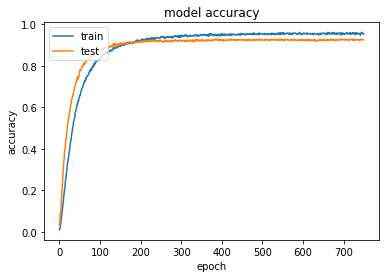

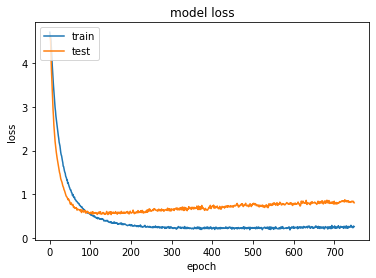

In [15]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()